# Topic: Naive Bayes Classifier

Md Kamran Ahmad

ID:160103020033

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from pprint import pprint
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [2]:
iris =  datasets.load_iris() 
x = iris.data 
y = iris.target
print(x[:5])
print(y[:20])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
#print(x[:,0])
#print(x[:,1])
#print(x[:,2])
print(x[:,3])

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]


In [4]:
#plt.scatter(x[:,0],x[:,1],marker='*', c=y)
#plt.show()

In [5]:
#plt.scatter(x[:,2],x[:,3],marker='*', c=y) 
#plt.show()

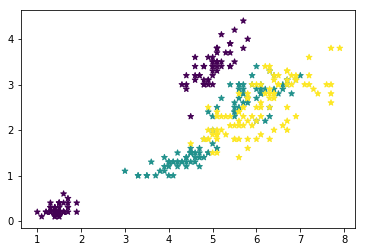

In [6]:
plt.scatter(x[:,0],x[:,1],marker='*', c=y)
plt.scatter(x[:,2],x[:,3],marker='*', c=y) 
plt.show()

In [7]:
def get_random_centroids(k):
    centroids={}
    while True:
        ri=np.random.choice(range(len(x)), k)
        print(ri)
        if len(set(ri))==k:  #found distinct k indexes.
            for i in range(k):
                centroids[i]=x[ri[i]]
            break

    return centroids

In [8]:
k = 3
centroids=get_random_centroids(k)
#print(centroids.keys())
print(centroids)

[140  82  26]
{0: array([6.7, 3.1, 5.6, 2.4]), 1: array([5.8, 2.7, 3.9, 1.2]), 2: array([5. , 3.4, 1.6, 0.4])}


In [9]:
def e_dist(x1, x2):
    return np.sqrt( (x1[0]-x2[0])**2 +  (x1[1]-x2[1])**2)

def e_dist(x1, x2):
    return np.linalg.norm(x1-x2)

In [10]:
e_dist(np.array([0,0]), np.array([3,4]))

5.0

In [11]:
print(centroids.items())

dict_items([(0, array([6.7, 3.1, 5.6, 2.4])), (1, array([5.8, 2.7, 3.9, 1.2])), (2, array([5. , 3.4, 1.6, 0.4]))])


In [12]:
xx=[8,9,5,3]
dd=[e_dist(xx,v) for k,v in centroids.items() ]
print(dd)

closest=dd.index( min(dd) )
print(closest)

[6.100819617067858, 6.998571282769077, 7.660287200882223]
0


In [13]:
for xx in x:                                        #for each sample
    dists=[e_dist(xx,v) for k,v in centroids.items() ]
    closest=dists.index( min(dists) )
    mc=list(centroids.values())[closest]
    print('xx =',xx,' closest centroid =',mc)
    

xx = [5.1 3.5 1.4 0.2]  closest centroid = [5.  3.4 1.6 0.4]
xx = [4.9 3.  1.4 0.2]  closest centroid = [5.  3.4 1.6 0.4]
xx = [4.7 3.2 1.3 0.2]  closest centroid = [5.  3.4 1.6 0.4]
xx = [4.6 3.1 1.5 0.2]  closest centroid = [5.  3.4 1.6 0.4]
xx = [5.  3.6 1.4 0.2]  closest centroid = [5.  3.4 1.6 0.4]
xx = [5.4 3.9 1.7 0.4]  closest centroid = [5.  3.4 1.6 0.4]
xx = [4.6 3.4 1.4 0.3]  closest centroid = [5.  3.4 1.6 0.4]
xx = [5.  3.4 1.5 0.2]  closest centroid = [5.  3.4 1.6 0.4]
xx = [4.4 2.9 1.4 0.2]  closest centroid = [5.  3.4 1.6 0.4]
xx = [4.9 3.1 1.5 0.1]  closest centroid = [5.  3.4 1.6 0.4]
xx = [5.4 3.7 1.5 0.2]  closest centroid = [5.  3.4 1.6 0.4]
xx = [4.8 3.4 1.6 0.2]  closest centroid = [5.  3.4 1.6 0.4]
xx = [4.8 3.  1.4 0.1]  closest centroid = [5.  3.4 1.6 0.4]
xx = [4.3 3.  1.1 0.1]  closest centroid = [5.  3.4 1.6 0.4]
xx = [5.8 4.  1.2 0.2]  closest centroid = [5.  3.4 1.6 0.4]
xx = [5.7 4.4 1.5 0.4]  closest centroid = [5.  3.4 1.6 0.4]
xx = [5.4 3.9 1.3 0.4]  

In [14]:
print(centroids)

{0: array([6.7, 3.1, 5.6, 2.4]), 1: array([5.8, 2.7, 3.9, 1.2]), 2: array([5. , 3.4, 1.6, 0.4])}


# Finding Good K using elbow method

In [17]:
nitr=200
sses={}
for k in range(1,13):                                                       #trying for different k value.
    
    centroids=get_random_centroids(k)
    old_centroids={}
    
    for i in range(nitr):
        clusters={}
        for ik,iv in centroids.items():
            clusters[ik]=[]

        print('centroids: ',centroids)
        
        for xx in x:
            dists=[e_dist(xx,v) for k,v in centroids.items() ] #k distance from k centroid.
            closest=dists.index( min(dists) )
            clusters[closest].append(xx)

            
        for ik in range(k):
            old_centroids[ik]=centroids[ik].copy()
            
            
        #update centroids.
        nc={}
        for ik in range(k):
            avg_c=np.array(clusters[ik]).mean(axis=0)
            nc[ik]=avg_c  #average.
            centroids[ik]=avg_c
            
            

        #checking centroids update.
        nupdate=0
        for ik in range(k):
            if e_dist( centroids[ik], old_centroids[ik] ) > 0:
                nupdate+=1
        if nupdate==0:
            print('NO FURTHER UPDATE')
            break
            
            
    sse=0               # Sum of Squared Error
    for cluster,centroid in zip(clusters.values() ,centroids.values()):
        for xx in cluster:
            d=e_dist(xx, centroid)
            sse+=d*d
    print('k=',k, 'sse=',sse)
    sses[k]=sse
    
    

[42]
centroids:  {0: array([4.4, 3.2, 1.3, 0.2])}
centroids:  {0: array([5.84333333, 3.05733333, 3.758     , 1.19933333])}
NO FURTHER UPDATE
k= 1 sse= 681.3706000000001
[131 101]
centroids:  {0: array([7.9, 3.8, 6.4, 2. ]), 1: array([5.8, 2.7, 5.1, 1.9])}
centroids:  {0: array([7.38571429, 3.13571429, 6.22857143, 2.08571429]), 1: array([5.68455882, 3.04926471, 3.50367647, 1.10808824])}
centroids:  {0: array([6.80232558, 3.04418605, 5.64883721, 2.03023256]), 1: array([5.45794393, 3.06261682, 2.99813084, 0.86542056])}
centroids:  {0: array([6.55070423, 2.96478873, 5.28732394, 1.85774648]), 1: array([5.20759494, 3.14050633, 2.3835443 , 0.60759494])}
centroids:  {0: array([6.36777778, 2.91666667, 5.05666667, 1.74      ]), 1: array([5.05666667, 3.26833333, 1.81      , 0.38833333])}
centroids:  {0: array([6.31458333, 2.89583333, 4.97395833, 1.703125  ]), 1: array([5.00555556, 3.34444444, 1.5962963 , 0.3037037 ])}
centroids:  {0: array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), 1: arr

centroids:  {0: array([5.24285714, 3.66785714, 1.5       , 0.28214286]), 1: array([4.70454545, 3.12272727, 1.41363636, 0.2       ]), 2: array([6.36333333, 2.96      , 5.38      , 2.06333333]), 3: array([5.48333333, 2.59166667, 3.90416667, 1.2       ]), 4: array([6.259375, 2.884375, 4.634375, 1.490625]), 5: array([7.38571429, 3.13571429, 6.22857143, 2.08571429])}
centroids:  {0: array([5.24285714, 3.66785714, 1.5       , 0.28214286]), 1: array([4.70454545, 3.12272727, 1.41363636, 0.2       ]), 2: array([6.39655172, 2.97241379, 5.42068966, 2.0862069 ]), 3: array([5.508, 2.6  , 3.908, 1.204]), 4: array([6.25757576, 2.88787879, 4.67272727, 1.51818182]), 5: array([7.42307692, 3.13076923, 6.26923077, 2.06923077])}
centroids:  {0: array([5.24285714, 3.66785714, 1.5       , 0.28214286]), 1: array([4.70454545, 3.12272727, 1.41363636, 0.2       ]), 2: array([6.45925926, 3.01481481, 5.48148148, 2.11481481]), 3: array([5.508, 2.6  , 3.908, 1.204]), 4: array([6.23333333, 2.86944444, 4.70277778, 1.5

k= 8 sse= 67.60932654026298
[110  79 104   1 112 138 126 109 136]
centroids:  {0: array([6.5, 3.2, 5.1, 2. ]), 1: array([5.7, 2.6, 3.5, 1. ]), 2: array([6.5, 3. , 5.8, 2.2]), 3: array([4.9, 3. , 1.4, 0.2]), 4: array([6.8, 3. , 5.5, 2.1]), 5: array([6. , 3. , 4.8, 1.8]), 6: array([6.2, 2.8, 4.8, 1.8]), 7: array([7.2, 3.6, 6.1, 2.5]), 8: array([6.3, 3.4, 5.6, 2.4])}
centroids:  {0: array([6.62857143, 3.11428571, 5.1       , 1.81428571]), 1: array([5.53913043, 2.58695652, 3.85652174, 1.16956522]), 2: array([6.48, 2.94, 5.7 , 2.12]), 3: array([5.006, 3.428, 1.462, 0.246]), 4: array([6.92857143, 3.01428571, 5.68571429, 2.02857143]), 5: array([5.85 , 2.935, 4.725, 1.695]), 6: array([6.35 , 2.715, 4.77 , 1.5  ]), 7: array([7.64285714, 3.22857143, 6.5       , 2.2       ]), 8: array([6.375, 3.35 , 5.675, 2.425])}
centroids:  {0: array([6.7       , 3.04444444, 5.02222222, 1.84444444]), 1: array([5.5125    , 2.58333333, 3.88333333, 1.19166667]), 2: array([6.4875, 2.9   , 5.625 , 2.0125]), 3: arra

centroids:  {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.24285714, 2.37142857, 3.44285714, 1.02857143]), 2: array([7.50909091, 3.13636364, 6.33636364, 2.04545455]), 3: array([5.8       , 2.53076923, 4.11538462, 1.23076923]), 4: array([5.87272727, 2.97272727, 4.39090909, 1.37272727]), 5: array([6.02777778, 2.73333333, 5.02777778, 1.79444444]), 6: array([5.4 , 2.8 , 3.75, 1.35]), 7: array([6.59130435, 3.0826087 , 5.55217391, 2.16086957]), 8: array([6.59230769, 3.02307692, 4.63846154, 1.45384615]), 9: array([5.15, 2.75, 4.5 , 1.6 ])}
centroids:  {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([5.24285714, 2.37142857, 3.44285714, 1.02857143]), 2: array([7.475, 3.125, 6.3  , 2.05 ]), 3: array([5.8       , 2.53076923, 4.11538462, 1.23076923]), 4: array([5.89166667, 2.96666667, 4.41666667, 1.375     ]), 5: array([6.02777778, 2.73333333, 5.02777778, 1.79444444]), 6: array([5.4 , 2.8 , 3.75, 1.35]), 7: array([6.56818182, 3.08636364, 5.53636364, 2.16363636]), 8: array([6.63333333, 3.03

In [18]:
sses

{1: 681.3706000000001,
 2: 152.34795176035794,
 3: 78.85566582597723,
 4: 71.76373890975627,
 5: 52.99335416666664,
 6: 39.03998724608725,
 7: 44.65208333333333,
 8: 67.60932654026298,
 9: 35.356716991342005,
 10: 34.32245271395273,
 11: 41.154448489010974,
 12: 25.984085470085468}

In [19]:
ks=[i+1 for i in range(len(sses.values()))]
print(ks)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


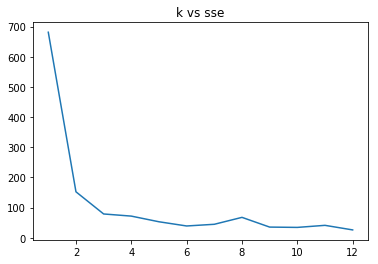

In [20]:
plt.plot(ks, sses.values())
plt.title('k vs sse')
plt.show()